# TP 01 : Régression linéaire et logistique binaire

Binômes : 
- Binôme 1
- Binôme 2

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.21.2', '1.4.1', '3.5.1')

In [2]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Cette partie sert à améliorer la compréhension les algorithmes d'apprentissage automatique vus en cours en les implémentant à partir de zéro. 
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Regression linéaire 

Premièrement, on va implémenter les fonctions nécéssaires pour la régression linéaire.

#### I.1.1. Fonction de prédiction

$$Z = zf(X, theta) = \theta_0 + \sum\limits_{j=1}^{N} \theta_j X_j = \sum\limits_{j=0}^{N} \theta_j X_j | X_0 = 1 $$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur de taille M

In [36]:
# TODO: Calculer la combinaison linéaire
# X: une matrice [M, N] de M échantillons et N caractéristiques
# Theta: un vecteur des paramètres (N)
# Résultat: un vecteur de M prédictions
def zf(X: np.ndarray, Theta: np.ndarray) -> np.ndarray:
    return np.sum(X * Theta, axis=1)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([1. , 1.7, 2.4])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
Theta_t = np.array([0.3, 0.007])
zf(X_t, Theta_t)

array([1. , 1.7, 2.4])

#### I.1.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$) en utilisant la fonction de prédiction $z$ précédente (H = Z(X, theta) et les valeurs réelles ($Y$).
Ici, on va utiliser l'erreur quadratique moyenne (MSE: mean square error). 

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$


In [44]:
# TODO: Définir la fonction du coût MSE
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résulat: une valeur réelle représenntant le coût MSE
def MSE(Y: np.ndarray, H: np.ndarray) -> float:
    return 1/(2*Y.shape[0]) * np.sum((Y - H)**2)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.016666666666666673
#---------------------------------------------------------------------
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
MSE(Y_t, H_t)

0.016666666666666673

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [46]:
# TODO: Définir la fonction de gradient MSE
# X: une matrice [M, N] de M échantillons et N caractéristiques
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résultat: un vecteur de N gradients (un gradient pour chaque théta)
def dMSE(X: np.ndarray, Y: np.ndarray, H: np.ndarray) -> np.ndarray:
    return 1/Y.shape[0] *np.sum(X * (H - Y)[:, np.newaxis], axis=0)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ -0.13333333, -30.        ])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
dMSE(X_t, Y_t, H_t)

array([ -0.13333333, -30.        ])

### I.2. Régression logistique

Ici, on va implémenter la régression logistique qui se base sur la combinaison linéaire de la régression linaire.

#### I.2.1. Fonction de prédiction

$$P(X, theta) = Sg(zf(X, theta)) $$

$$Sg(Z) = \frac{1}{1+e^{-Z}}$$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur 

In [54]:
# TODO La fonction ségmoid
# Fonction d'activation utilisée pour rendre des valeurs réelles entre 0 et 1
# Z: un scalaire ou un vecteur de taille M 
# Résulat: un scalaire ou un vecteur de taille M
def sg(Z: np.ndarray) -> np.ndarray: 
    # Fonction d'activation utilisée pour rendre les valeurs réelles entre 0 et 1
    return 1 / (1 + np.exp(-Z))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.5, array([0.26894142, 0.73105858]))
#---------------------------------------------------------------------
sg(0), sg(np.array([-1, 1]))

(0.5, array([0.26894142, 0.73105858]))

In [55]:
# TODO La fonction ségmoid
# Probabilité de la régression logistique
def Hf_log(X, Theta): 
    return sg(zf(X, Theta))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.5621765 , 0.99477987, 0.02297737])
#---------------------------------------------------------------------
X_t = np.array([[1., 0], [1., 10.], [1., -8]])
Theta_t = np.array([0.25, 0.5])

Hf_log(X_t, Theta_t)

array([0.5621765 , 0.99477987, 0.02297737])

#### I.2.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$).
Ici, on va utiliser l'entropie croisée binaire (BCE: Binary Cross Entropy Loss). 

$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Puisque $Y^{(i)} \in \{0, 1\}$, donc : 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

En pratique, on peut ajouter une petite valeur $\epsilon$ à l'argument de la fonction $\log$ afin d'éviter $\log(0)$

In [90]:
# TODO : La fonction de cout BCE
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résultat: une valeur réelle qui représente l'erreur BCE
def BCE(Y: np.ndarray, H: np.ndarray, eps: float =1e-8) -> float: 
    return -1/Y.shape[0] * np.sum(Y*np.log(H+eps) + (1-Y)*np.log(1-H+eps))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.6181210330417681
#---------------------------------------------------------------------
Y_t = np.array([1., 0., 0., 1.])
H_t = np.array([0.25, 0.25, 0.5, 0.9])
BCE(Y_t, H_t)

0.61812101133625

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [91]:
# La fonction de gradient BCE est la même que celle de MSE
def dBCE(X: np.ndarray, Y: np.ndarray, H: np.ndarray) -> np.ndarray:
    return dMSE(X, Y, H)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([-0.08333333, -0.25      ])
#---------------------------------------------------------------------
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
H_t = np.array([2.75, 5.25, 4.25])
Y_t = np.array([3., 5., 4.5])
dMSE(X_t, Y_t, H_t)

array([-0.08333333, -0.25      ])

### I.3. Déscente du gradient 


#### I.3.1. Fonction de convergence

Ici, on veut implémenter une fonction qui décide l'arrêt de la déscente du gradient en se basant sur : 
- L'erreur actuelle $J$ et l'erreur précédente $J0$
- Nombre des itérations max $IT$ et l'itération actuelle $it$

Cette fonction renvoit **True** si :
- on a atteint le nombre maximal des itérations
- l'erreur a augmenté (si var=True) sinon on ne prend pas la variation de l'erreur en considération

In [81]:
# TODO: Définir la fonction d'arret de la descente du gradient
def arreter(J0: float, J: float, it_max: int, it: int, var:bool=True) -> bool:
    return it == it_max or (var and J > J0)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (False, True, True, False)
#---------------------------------------------------------------------
arreter(0.5, 0.2, 100, 0), arreter(0.1, 0.2, 100, 5), arreter(0.5, 0.2, 100, 100), arreter(0.1, 0.2, 100, 5, var=False)

(False, True, True, False)

#### I.3.2. Fonction de mise à jour des paramètres

$$\theta_i = \theta_i - \alpha \frac{\partial J}{\partial \theta_j}$$

Cette fonction doit retourner les nouveaux thetats

In [83]:
# TODO: Définir la fonction de la mise ç jours des paramètres
def majTheta(Theta: np.ndarray, Gradient: np.ndarray, alpha: float): 
    return Theta - alpha*Gradient

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.30013333, 0.037     ])
#---------------------------------------------------------------------
Theta_t = np.array([0.3, 0.007])
Gradient_t = np.array([ -0.13333333, -30.])
alpha_t = 0.001
majTheta(Theta_t, Gradient_t, alpha_t)

array([0.30013333, 0.037     ])

#### I.3.3. Déscente du gradient


In [84]:
def descente(X, Y, Theta, Hf=zf, Jf=MSE, dJf=dMSE, it_max=100, alpha=0.1, var=True): 

    H0 = Hf(X, Theta)
    J0 = Jf(Y, H0)
    it = 0
    couts  = []
    Thetas = []
    
    #pour ne pas modifier le contenu de Theta en entrée
    Theta = Theta.copy()
    
    while True:
        couts.append(J0)
        Thetas.append(Theta.copy())
        Gradient = dJf(X, Y, H0)
        Theta = majTheta(Theta, Gradient, alpha)
        H = Hf(X, Theta)
        J = Jf(Y, H)
        if arreter(J0, J, it_max, it, var=var):
            break
        
        J0 = J
        H0 = H
        it += 1
    
    return Thetas, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : ([array([0.3  , 0.007])], [0.016666666666666653])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
Theta_t = np.array([0.3, 0.007])
Y_t = np.array([1., 2., 2.5])
IT_max = 5
alpha_t = 0.001

descente(X_t, Y_t, Theta_t, it_max=IT_max, alpha=alpha_t)

([array([0.3  , 0.007])], [0.016666666666666653])

### I.4. Regroupement et test de l'implémentation


In [92]:
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std  = np.std(X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre, mean=mean, std=std)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0], 1)), X_pre, axis=1)
    return X_pre, mean, std

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)


class Regression(object):
    def __init__(self, alpha=.01, log=True, norm=True, const=True): 

        self.alpha = alpha
        self.norm = norm
        self.const = const
        self.log = log
        if log: # Régression logistique
            self.Hf = Hf_log 
            self.Jf = BCE
            self.dJf = dBCE
        else: # Régression linéaire
            self.Hf = zf
            self.Jf = MSE
            self.dJf = dMSE
        
    
    def entrainer(self, X, Y, it_max=100): 
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const)
        Theta = generer_uns_1(X_pre.shape[1])# Supposons, les paramètres sont initialisés à 1
        self.Thetas, self.couts = descente(X_pre, Y, Theta, 
                                           it_max=it_max, 
                                           alpha = self.alpha,
                                           Hf = self.Hf, # fonction logistique
                                           Jf = self.Jf,
                                           dJf = self.dJf
                                          )
        
    # La prédiction
    # si classes=True elle rend un vecteur de 1 et 0
    # sinon elle rend un vecteur de probabilités
    def predire(self, X, classes=True, seuil=0.5):
        X_pre, _, _ = preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = self.Hf(X_pre, self.Thetas[-1])
        if self.log and classes:
            return (H >= seuil).astype(int)
        return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.86383643, 0.5273866 , 0.96123235]),
#  array([0.43202275, 0.34036983, 0.91600922, 0.88093098]))
#---------------------------------------------------------------------

X_t = np.array([
    [100, 20],
    [200, 10],
    [300, 40],
    [400, 30]
])

Y_t = np.array([1, 0, 1, 0])

# logistique
reglog = Regression()
reglog.entrainer(X_t, Y_t)


reglog.Thetas[-1], reglog.predire(X_t, classes=False)

(array([0.86383643, 0.5273866 , 0.96123235]),
 array([0.43202275, 0.34036983, 0.91600922, 0.88093098]))

## II. Application et analyse

Dans cette partie, on va faire des petites expérimentations afin de tester l'effet des différents paramètres. 
On utilise des outils déjà existants comme scikit-learn. 
Ce qui est demandé est de discuter les résultats.

### II.1. Régression linéaire 

In [93]:
header = ["Superficie", "Prix"]
houses = pd.read_csv("datasets/houses.csv", names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [94]:
from sklearn.model_selection import train_test_split  

Xhouses = houses.iloc[:, :-1].values # Premières colonnes 
Yhouses = houses.iloc[:,-1].values # Dernière colonne 

Xhouses_train, Xhouses_test, Yhouses_train, Yhouses_test = train_test_split(Xhouses, Yhouses, test_size=0.2, random_state=0)  

len(Xhouses_train), len(Xhouses_test)

(37, 10, 37, 10)

#### II.1.1. Taux d'apprentissage et convergence 

Ici, nous avons varié le taux d'apprentissage et afficher les courbes de la fonction objective par rapport à l'itération. 

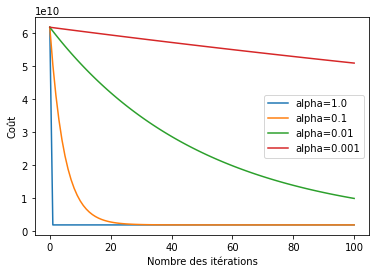

In [95]:
ITMAX  = 100
alphas = [1., 0.1, 0.01, 0.001]

# Création et entraînement des nouveaux modèles de régression linéaire
for alpha in alphas:
    # Création d'un nouveau modèle de régression linéaire
    modele = Regression(alpha=alpha, log=False)
    # Entraînement du modèle
    modele.entrainer(Xhouses_train, Yhouses_train, it_max=ITMAX)
    # Visualisation de la convergence
    plt.plot(modele.couts, label = 'alpha=' + str(alpha))
    
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO : Analyser les résultats**
- Que remarquez-vous ? 
- Donner une hypothèse concernant le taux d'apprentissage
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

**Réponse :** 
- ...
- ...
- ...

#### II.1.2. Prediction 

On veut tester la capacité de prédiction en utilisant la régression linéaire.
Pour ce faire, on entraîne un modèle de régression pour prédire les prix des maisons en se basant sur la superficie.

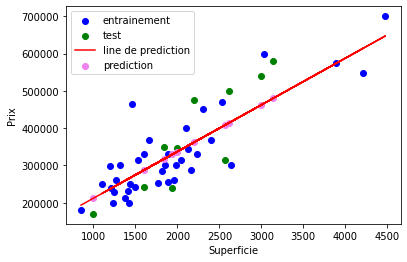

In [17]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline

# Entraînement d'un modèle de régression linéaire 
# Premièrement, on crée un pipeline avec une standardisation suivie par une regression linéaire
regresseur1 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# Ensuite, on entraîne le modèle sur les données d'entraînement
regresseur1.fit(Xhouses_train, Yhouses_train)

# On utilise le modèle pour prédire les prix sur le dataset d'entraînement
Yhouses_pred = regresseur1.predict(Xhouses_test )
# On utilise le modèle pour prédire les prix sur le dataset de test
Yhouses_line = regresseur1.predict(Xhouses_train)  

# Visualiser la distribution des données d'entraînement et de test
# Aussi, la ligne de prédiction et la prédiction du dataset de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue',   label = 'entrainement'      )
plt.scatter(Xhouses_test,  Yhouses_test,  color='green',  label = 'test'              )
plt.plot   (Xhouses_train, Yhouses_line,  color="red",    label = 'line de prediction')
plt.scatter(Xhouses_test,  Yhouses_pred,  color="violet", label = "prediction"        )
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

**TODO : Analyser les résultats**
- Que remarquez-vous ?
- Est-ce que la régression linéaire peut prédire exactement les valeurs Y ?
- Pourquoi ?

**Réponse :**
- ... 
- ...
- ...

#### II.1.3. Prediction avec régression polynomiale

On veut tester si l'utilisation de plusieurs caracétristiques peut améliorer la prédiction. 
Aussi, on veut savoir si plusieurs caractéristiques améliore toujours la qualité de prédiction. 
Pour ce faire, nous avons créé des nouvelles caractéristiques pour avoir une régression polynomiale : $X^5$ et $X^{10}$.

Pour évaluer la performance des modèles, on va se baser sur l'aspet visuel et aussi l'erreur RMSE.

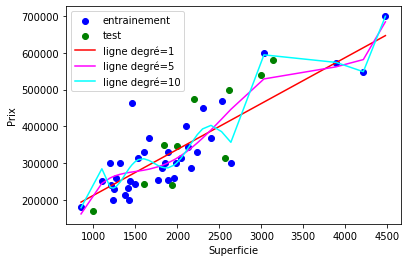

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics       import mean_squared_error

degres = [5, 10]

erreurs_labels = [1] + degres
erreurs_rmse   = [np.sqrt(mean_squared_error(Yhouses_test, Yhouses_pred))]

couleurs=['magenta', 'cyan']

# Ordonner le dataset en se basant sur la superficie
# Ensuite, récupérer la liste des indexes (positions ordonnées)
idx = Xhouses_train[:,0].argsort()

# Visualiser la distribution des données d'entraînement et de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue',  label = 'entrainement')
plt.scatter(Xhouses_test,  Yhouses_test,  color='green', label = 'test')
# Dessiner la ligne de décision
plt.plot(Xhouses_train[idx], regresseur1.predict(Xhouses_train[idx]), color='red', label = 'ligne degré=1')

# Entraîner des modèles polynomiaux et visualiser leur convergence
for i in range(len(degres)):
    regresseur = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False), 
                               StandardScaler(with_mean=False), 
                               LinearRegression())  
    regresseur.fit(Xhouses_train, Yhouses_train)  
    plt.plot(Xhouses_train[idx], regresseur.predict(Xhouses_train)[idx], 
             color=couleurs[i],  label = "ligne degré=" + str(degres[i]))
    Yhouses_pred = regresseur.predict(Xhouses_test) 
    erreurs_rmse.append(np.sqrt(mean_squared_error(Yhouses_test, Yhouses_pred)))

plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [19]:
pd.DataFrame({
    "Degré"         : erreurs_labels,
    "Erreur (RMSE)" : erreurs_rmse
})

,Degré,Erreur (RMSE)
0,1,76300.858343
1,5,68683.844226
2,10,125675.109105


**TODO : Analyser les résultats**

- Que remarquez-vous (lignes de prédiction et erreur par rapport le degré)?
- Donner une hypothèse (en précisant si plus de données ou avoir des données complexes peut/doit améliorer la performance)
- Essayer de justifier cette hypothèse par rapport ce que vous avez vu en cours 
- 

**Réponse :**
- ...
- ...
- ...

### II.2. Régression logistique binaire 

In [20]:
notes = pd.read_csv("datasets/notes.csv")

# Extraction des features 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 

Y_notes = notes.iloc[:,-1].values # Dernière colonne 

notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


#### II.2.1. Normalisation et convergence 

Ici, on veut tester l'effet de la normalisation sur la convergence du modèle.
Pour ce faire, nous avons entraîné deux modèles : un sur les données non normalisées et l'autres sur les mêmes données mais normalisées. On s'intresse ici par le nombre des itérations necessaires pour atteindre un minimum d'erreur.

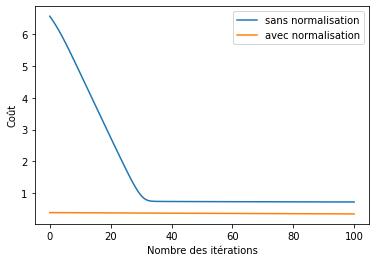

In [21]:
ALPHA = 0.01
ITMAX = 200

# Création des modèles
reg_log_nonorm = Regression(norm=False, alpha=ALPHA, log=True) # sans normalisation
reg_log_norm   = Regression(norm=True,  alpha=ALPHA, log=True) # avec normalisation

# Entraînement des modèles
reg_log_nonorm.entrainer(X_notes, Y_notes)
reg_log_norm  .entrainer(X_notes, Y_notes)

# Visualisation de la convergence
plt.plot(reg_log_nonorm.couts, label = 'sans normalisation')
plt.plot(reg_log_norm.couts,   label = 'avec normalisation')
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO : Analyser les résultats**

- Que remarquez-vous ?
- Donner une hypothèse (convergence avec normalisation)
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

**Réponse**

- ...
- ...
- ...

#### II.2.2. Complexité du modèle et apprentissage

On veut améliorer la séparation entre les deux classes : "admis" et "non admis". Pour ce faire, on a proposé d'ajouter des caractéristiques complexes : $X^3$ et $X^5$.

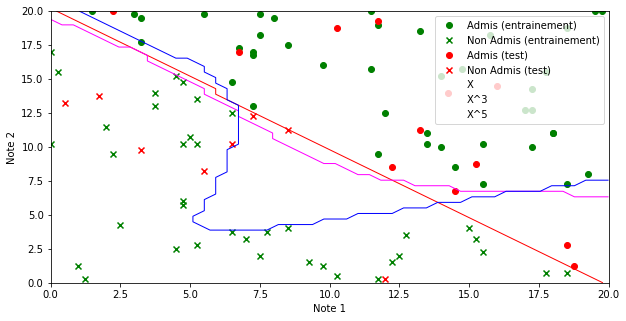

In [22]:
from sklearn.linear_model import LogisticRegression

# ce block du code est pour filtrer les avertissements concernant la convergence du modèle
# en général, lorsque e nombre des itérations n'est pas suffisant pour atteindre l'erreur minimale
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

degres = [3, 5]
couleurs=['red', 'magenta', 'blue']

# Une fonction pour dessiner le plan de séparation binaire étant donnée un modèle
# modele : c'est un modèle enttraîné pour la prédiction binaire
# ax: un objet de type matplotlib.axes.Axes; les axes sur lesquels on va dessiner
# xrange: une liste des points sur l'axe X
# yrange: une liste des points sur l'axe Y
# couleur: la couleur du dessin (de la ligne de séparation)
# label: l'étiquêtte du dessin (la ligne de séparation)
def dessiner2D(modele, ax, xrange, yrange, couleur='red', label=''):
    # Créer une matrice de (xrange X yrange): notre plan de dessin
    XX = [[[xr, yr] for xr in xrange] for yr in yrange]
    # Représenter le sous forme d'une matrice de (xrange X yrange)/2 échantillons et 2 caractéristiques
    XX = np.array(XX).reshape(-1, 2)
    # Prédire les probabilités (estimation) et retransformer vers notre plan (xrange X yrange)
    grid = modele.predict(XX).reshape(len(xrange), len(yrange))
    # Dessiner des lignes qui passent par les valeurs 0.5
    cs = ax.contour(xrange, yrange, grid, colors=[couleur], linewidths=(1), linestyles=('-'),levels=[0.5])
    # Affecter l'étiquêtte à la ligne de séparation (qui es un contour dans notre cas)
    cs.collections[0].set_label(label)


X_notes_train = X_notes[:80, :]
X_notes_test  = X_notes[80:, :]
Y_notes_train = Y_notes[:80   ]
Y_notes_test  = Y_notes[80:   ]

# Trouver les indexes ordonnées 
idx2 = X_notes_train[:,0].argsort()

# Sélectionner le cas "admis" dans l'entraînement et le test
oui_train = Y_notes_train == 1
oui_test  = Y_notes_test  == 1

# Dessiner les cas "admis" et "Non admis" de l'entraînement et du test
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_notes_train[oui_train, 0], X_notes_train[oui_train, 1], 
           color='green', marker='o', label='Admis (entrainement)')
ax.scatter(X_notes_train[~oui_train, 0], X_notes_train[~oui_train, 1], 
           color='green', marker='x', label='Non Admis (entrainement)')
ax.scatter(X_notes_test[oui_test, 0], X_notes_test[oui_test, 1], 
           color='red', marker='o', label='Admis (test)')
ax.scatter(X_notes_test[~oui_test, 0], X_notes_test[~oui_test, 1], 
           color='red', marker='x', label='Non Admis (test)')

# Créer l'espace des notes : entre 0 et 20 avec une résolution de 50
xrange = np.linspace(0, 20, 50) # Note 1
yrange = np.linspace(0, 20, 50) # Note 2

# Dessiner la ligne de séparation dans une régression linéaire
reglog1 = LogisticRegression(penalty='none')
reglog1.fit(X_notes_train, Y_notes_train)
dessiner2D(reglog1, ax, xrange, yrange, label='X')

# Dessiner la ligne de séparation dans une régression polynomiale
# Le modèle dans ce cas est un pipeline qui commence par créer des caractéristiques polynomiales
# ensuite passe le résultat vers un modèle de régression logistique
for i in range(len(degres)):
    modele = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False),
                           LogisticRegression(penalty='none'))
    modele.fit(X_notes_train, Y_notes_train)
    dessiner2D(modele, ax, xrange, yrange, couleur=couleurs[i+1], label='X^' + str(degres[i]))


plt.xlabel('Note 1')
plt.ylabel('Note 2')
plt.legend(loc='upper right')
plt.show()

**TODO : Analyser les résultats**

- Que remarquez-vous (les nouveaux modèles ont-il été capables d'améliorer le modèle initial: l'adjustement/fitting et la généralisation) ? 
- Donner une hypothèse (Quelle est la raison d'amélioration/détérioration ?) 
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

**Réponse**

- ...
- ...
- ...